In [17]:
import pandas as pd
import prophet
import matplotlib.pyplot as plt
%matplotlib inline
import fbprophet

In [4]:
data = pd.read_csv('cleaned_data_pangan.csv')
data.tail()

,Tanggal,Beras,Beras Kualitas Bawah I (kg),Beras Kualitas Bawah II (kg),Beras Kualitas Medium I (kg),Beras Kualitas Medium II (kg),Beras Kualitas Super I (kg),Beras Kualitas Super II (kg),Bawang Merah,Bawang Merah Ukuran Sedang (kg),Bawang Putih,Bawang Putih Ukuran Sedang (kg),Cabai Merah,Cabai Merah Besar (kg),Cabai Merah Keriting (kg),Cabai Rawit,Cabai Rawit Hijau (kg),Cabai Rawit Merah (kg)
1365,2021-04-26,11750.0,10750.0,10450.0,11800.0,11600.0,13050.0,12700.0,33300.0,33300.0,30250.0,30250.0,43100.0,45050.0,42750.0,57050.0,48750.0,65900.0
1366,2021-04-27,11750.0,10750.0,10450.0,11800.0,11600.0,13050.0,12650.0,33250.0,33250.0,30200.0,30200.0,42000.0,44350.0,41650.0,56200.0,47750.0,65200.0
1367,2021-04-28,11750.0,10750.0,10450.0,11800.0,11600.0,13050.0,12650.0,33200.0,33200.0,30150.0,30150.0,41400.0,43500.0,41050.0,56000.0,47600.0,65150.0
1368,2021-04-29,11750.0,10750.0,10400.0,11750.0,11600.0,13050.0,12650.0,33100.0,33100.0,30250.0,30250.0,40700.0,43500.0,39950.0,55550.0,47500.0,64250.0
1369,2021-04-30,11750.0,10750.0,10400.0,11800.0,11550.0,13050.0,12650.0,33100.0,33100.0,30200.0,30200.0,40150.0,42950.0,39250.0,55000.0,46850.0,63850.0


In [5]:
data['Tanggal'] = pd.to_datetime(data['Tanggal'], infer_datetime_format=True)

In [4]:
data = data.set_index('Tanggal')

In [6]:
data.columns = data.columns.str.replace(' ' , '_')

In [7]:
df = data[['Tanggal','Bawang_Merah']]

In [8]:
df.head()

,Tanggal,Bawang_Merah
0,2017-07-31,33500.0
1,2017-08-01,33200.0
2,2017-08-02,32950.0
3,2017-08-03,32650.0
4,2017-08-04,32150.0


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1370 entries, 0 to 1369
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Tanggal       1370 non-null   datetime64[ns]
 1   Bawang_Merah  1370 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 21.5 KB


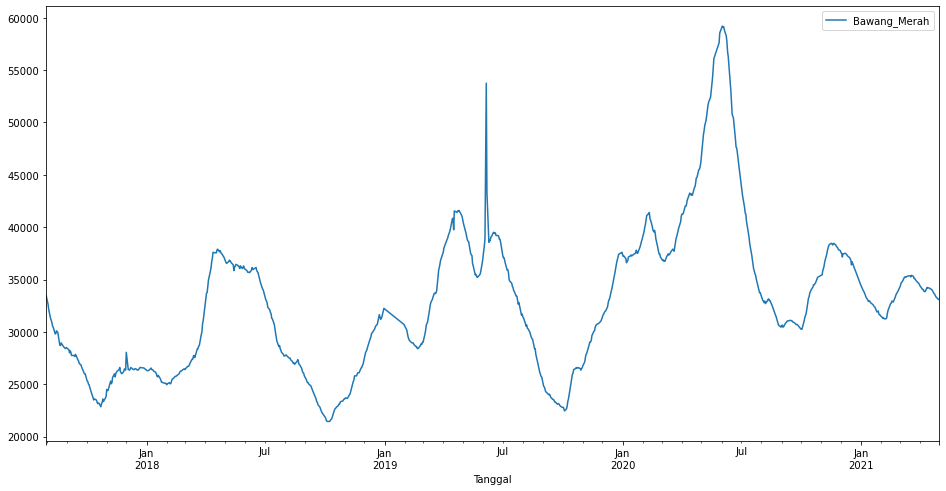

In [11]:
df.plot(x ='Tanggal', y ='Bawang_Merah', figsize=(16,8))

In [15]:
df.columns = ['ds','y']
df.head()

,ds,y
0,2017-07-31,33500.0
1,2017-08-01,33200.0
2,2017-08-02,32950.0
3,2017-08-03,32650.0
4,2017-08-04,32150.0


In [19]:
from fbprophet import Prophet

In [20]:
dir(Prophet)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_load_stan_backend',
 'add_country_holidays',
 'add_group_component',
 'add_regressor',
 'add_seasonality',
 'construct_holiday_dataframe',
 'fit',
 'flat_growth_init',
 'flat_trend',
 'fourier_series',
 'initialize_scales',
 'linear_growth_init',
 'logistic_growth_init',
 'make_all_seasonality_features',
 'make_future_dataframe',
 'make_holiday_features',
 'make_seasonality_features',
 'parse_seasonality_args',
 'percentile',
 'piecewise_linear',
 'piecewise_logistic',
 'plot',
 'plot_components',
 'predict',
 'predict_seasonal_components',
 'predict_trend',
 'predict_uncertainty',
 'predictive_samples',
 'regressor_col

In [42]:
# Initialize the Model
model=Prophet()

In [43]:
df.columns

Index(['ds', 'y'], dtype='object')

In [44]:
model.fit(df)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [45]:
model.component_modes

{'additive': ['yearly',
  'weekly',
  'additive_terms',
  'extra_regressors_additive',
  'holidays'],
 'multiplicative': ['multiplicative_terms', 'extra_regressors_multiplicative']}

In [46]:
### Create future dates of 90 days
future_dates=model.make_future_dataframe(periods=90)

In [47]:
future_dates.tail()

,ds
1455,2021-07-25
1456,2021-07-26
1457,2021-07-27
1458,2021-07-28
1459,2021-07-29


In [48]:
prediction=model.predict(future_dates)

In [49]:
prediction.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2017-07-31,35994.047482,30207.511686,35812.679358,35994.047482,35994.047482,-3036.623329,-3036.623329,-3036.623329,-11.980071,-11.980071,-11.980071,-3024.643259,-3024.643259,-3024.643259,0.0,0.0,0.0,32957.424153
1,2017-08-01,35931.415366,29791.653130,35460.120534,35931.415366,35931.415366,-3182.212902,-3182.212902,-3182.212902,-18.552043,-18.552043,-18.552043,-3163.660859,-3163.660859,-3163.660859,0.0,0.0,0.0,32749.202464
2,2017-08-02,35868.783250,29597.977099,35382.501104,35868.783250,35868.783250,-3286.837801,-3286.837801,-3286.837801,10.733305,10.733305,10.733305,-3297.571106,-3297.571106,-3297.571106,0.0,0.0,0.0,32581.945450
3,2017-08-03,35806.151135,29590.672696,35350.266949,35806.151135,35806.151135,-3394.288739,-3394.288739,-3394.288739,32.438191,32.438191,32.438191,-3426.726929,-3426.726929,-3426.726929,0.0,0.0,0.0,32411.862396
4,2017-08-04,35743.519019,29379.422763,34894.668433,35743.519019,35743.519019,-3562.730643,-3562.730643,-3562.730643,-11.224388,-11.224388,-11.224388,-3551.506255,-3551.506255,-3551.506255,0.0,0.0,0.0,32180.788376


In [55]:
prediction.loc[prediction['ds'] > '2021-04-30']

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
1370,2021-05-01,30675.912810,35129.573550,40617.065121,30675.912810,30675.912810,7145.393795,7145.393795,7145.393795,3.949224,3.949224,3.949224,7141.444571,7141.444571,7141.444571,0.0,0.0,0.0,37821.306605
1371,2021-05-02,30639.605949,35028.967555,40679.333739,30639.605949,30639.605949,7166.228759,7166.228759,7166.228759,-5.364218,-5.364218,-5.364218,7171.592977,7171.592977,7171.592977,0.0,0.0,0.0,37805.834708
1372,2021-05-03,30603.299088,34970.942579,40670.892808,30603.299088,30603.299088,7190.092633,7190.092633,7190.092633,-11.980071,-11.980071,-11.980071,7202.072703,7202.072703,7202.072703,0.0,0.0,0.0,37793.391721
1373,2021-05-04,30566.992227,35058.755458,40495.333426,30566.992227,30566.992227,7215.698069,7215.698069,7215.698069,-18.552043,-18.552043,-18.552043,7234.250112,7234.250112,7234.250112,0.0,0.0,0.0,37782.690297
1374,2021-05-05,30530.685366,35185.819756,40534.818193,30530.685366,30530.685366,7280.215997,7280.215997,7280.215997,10.733305,10.733305,10.733305,7269.482692,7269.482692,7269.482692,0.0,0.0,0.0,37810.901364
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,2021-07-25,27589.829638,22679.826655,28358.364856,26844.396893,28310.439585,-2073.238548,-2073.238548,-2073.238548,-5.364218,-5.364218,-5.364218,-2067.874330,-2067.874330,-2067.874330,0.0,0.0,0.0,25516.591089
1456,2021-07-26,27553.522777,22467.092628,28370.833420,26799.975672,28283.619015,-2254.949483,-2254.949483,-2254.949483,-11.980071,-11.980071,-11.980071,-2242.969413,-2242.969413,-2242.969413,0.0,0.0,0.0,25298.573294
1457,2021-07-27,27517.215916,22185.974980,27901.295719,26759.522574,28261.681303,-2430.157076,-2430.157076,-2430.157076,-18.552043,-18.552043,-18.552043,-2411.605033,-2411.605033,-2411.605033,0.0,0.0,0.0,25087.058840
1458,2021-07-28,27480.909055,21964.167286,27921.184098,26714.668847,28236.115983,-2563.171115,-2563.171115,-2563.171115,10.733305,10.733305,10.733305,-2573.904420,-2573.904420,-2573.904420,0.0,0.0,0.0,24917.737940


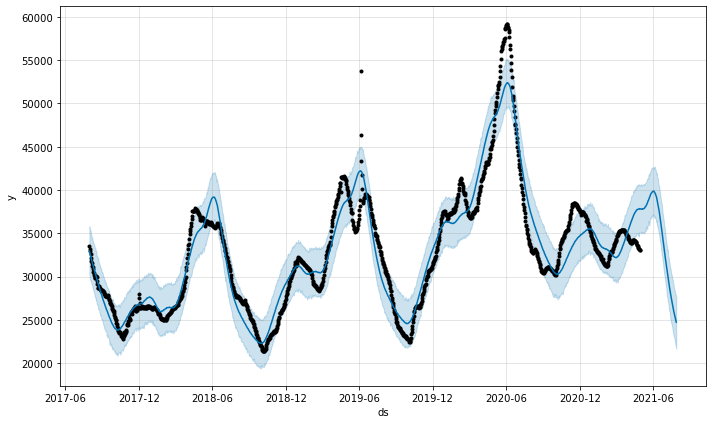

In [52]:
### plot the predicted projection
model.plot(prediction);

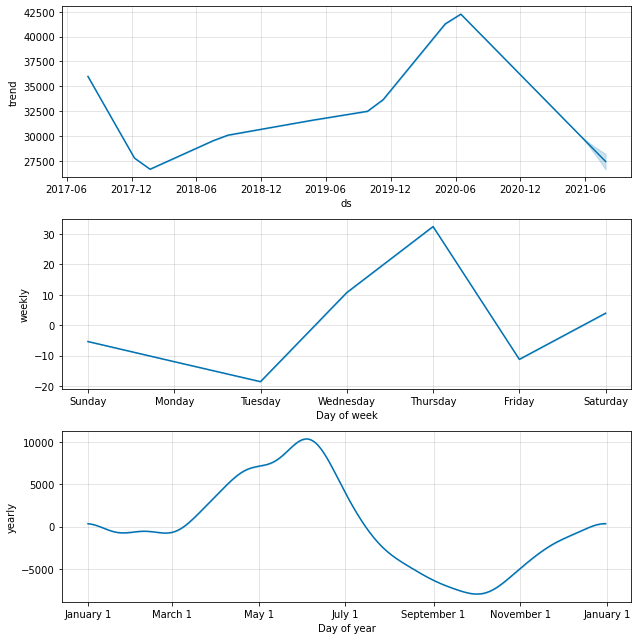

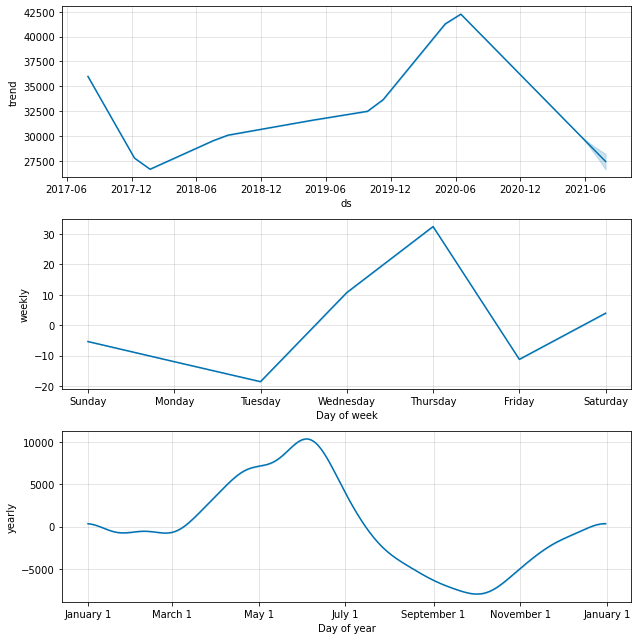

In [51]:
#### Visualize Each Components[Trends,yearly]
model.plot_components(prediction)

In [31]:
from fbprophet.diagnostics import cross_validation
df_cv = cross_validation(model, initial='730 days', period='180 days', horizon = '365 days')
df_cv.head()

INFO:fbprophet:Making 2 forecasts with cutoffs between 2019-11-02 00:00:00 and 2020-04-30 00:00:00


,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2019-11-03,26048.881322,24786.440218,27260.871280,27016.666667,2019-11-02
1,2019-11-04,26138.240395,24917.385429,27473.326754,27150.000000,2019-11-02
2,2019-11-05,26241.387840,24958.869780,27504.478295,27550.000000,2019-11-02
3,2019-11-06,26395.900804,25141.416145,27688.317308,27850.000000,2019-11-02
4,2019-11-07,26559.219164,25344.419976,27873.255934,27950.000000,2019-11-02


In [33]:
df_cv.tail()

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
725,2021-04-26,47935.697458,22743.643060,75388.288932,33300.0,2020-04-30
726,2021-04-27,47807.661731,23008.538326,74875.587906,33250.0,2020-04-30
727,2021-04-28,47698.669531,23006.989794,75181.590332,33200.0,2020-04-30
728,2021-04-29,47568.512054,21651.823454,74722.660942,33100.0,2020-04-30
729,2021-04-30,47294.046668,21549.412405,74767.793876,33100.0,2020-04-30


In [32]:
from fbprophet.diagnostics import performance_metrics
df_p = performance_metrics(df_cv)
df_p.head()

,horizon,mse,rmse,mae,mape,mdape,coverage
0,37 days,9.980980e+07,9990.485540,7506.116191,0.148569,0.074765,0.020548
1,38 days,1.035928e+08,10178.054594,7704.101034,0.151851,0.074765,0.006849
2,39 days,1.071705e+08,10352.320339,7885.086531,0.154790,0.098055,0.000000
3,40 days,1.103575e+08,10505.117919,8041.429872,0.157251,0.115889,0.000000
4,41 days,1.130125e+08,10630.733232,8176.341964,0.159413,0.127680,0.000000


In [34]:
df_p.tail()

,horizon,mse,rmse,mae,mape,mdape,coverage
324,361 days,8.701080e+07,9327.958125,8578.998056,0.254257,0.201956,1.0
325,362 days,8.969044e+07,9470.503679,8725.176063,0.258534,0.202713,1.0
326,363 days,9.228596e+07,9606.557923,8866.413067,0.262665,0.202713,1.0
327,364 days,9.478419e+07,9735.717008,9000.808056,0.266604,0.219690,1.0
328,365 days,9.709354e+07,9853.605195,9125.595755,0.270250,0.230614,1.0


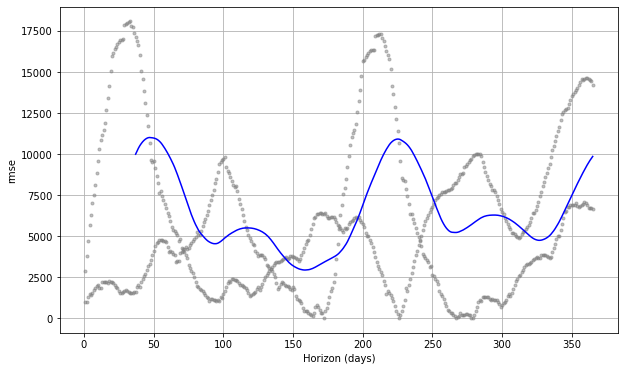

In [35]:
from fbprophet.plot import plot_cross_validation_metric
fig = plot_cross_validation_metric(df_cv, metric='rmse')